<a href="https://colab.research.google.com/github/Evelyn-Rojas/Ecuaciones-diferenciales-parciales-ll/blob/main/Crank_nicolson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='salmon'> **Evelyn Tania Rojas Roa**

---



###<font color='darkorange'>**Método implícito de Crank-Nicolson**

* Molécula computacional del método:

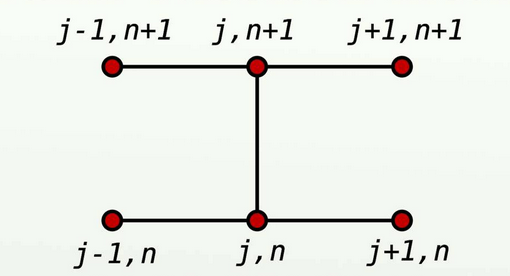

### <font color='coral'> **Ecuación de calor**

$$\frac{\partial^2 u}{\partial x^2} +\frac{\partial u}{\partial t} = 0$$
Sujeta a:
$$u(0,t)=0,u(1,t)=0, \;\;\; t<1$$

$$
u(x,0) = 1-4(x-0.5)^2, 0≤ x ≤ 1 \quad
$$

Solución exacta obtenida a partir de separación de variables y series de Fourier:

$u(x, t) = \sum_{k=1}^{\infty} \frac{32}{((2k-1)\pi)^3} \sin((2k-1)\pi x) e^{-((2k-1)\pi)^2 t}$

Usaremos:

$h=0.1$

$k=0.01$

In [2]:
#Importamos la librerias necesarias
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from tabulate import tabulate #Permite convertir listas, diccionarios o DataFrames en tablas con formato

In [3]:
#definimos una función para la condición
def f(x):
 return 1-4*(x-0.5)**2

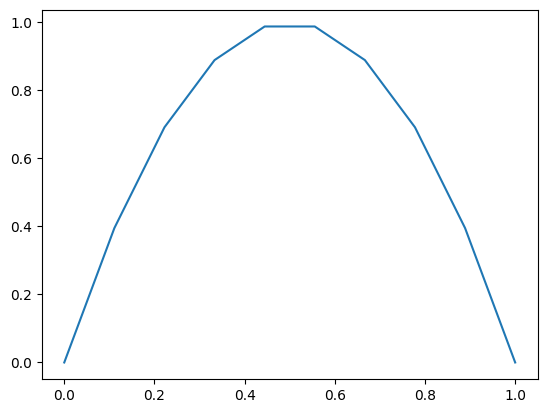

In [4]:
#Gráficamos la condición
x=np.linspace(0,1,10)
plt.plot(x, f(x))
#Desde aquí podemos notar la simetría que habrá

In [5]:
#Definimos la función para generar las matrices tridiagonales
def tridiagonal (n,a,b):
 return sp.Matrix([
    [a if i==j else b if abs (i-j)==1 else 0 for j in range (n)]
    for i in range (n)
])

In [6]:
#Definimos r= k/h^2
r=1

In [7]:
A=tridiagonal (9, 2+2*r,-r)

In [ ]:
A

Matrix([
[ 4, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  4, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  4, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  4, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  4, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  4, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  4, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  4, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  4]])

In [8]:
B=tridiagonal (9,2-2*r,r)

In [ ]:
B

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [9]:
b=sp.Matrix([f(0.1*(i+1)) for i in range (9)])

In [ ]:
b

Matrix([
[0.36],
[0.64],
[0.84],
[0.96],
[ 1.0],
[0.96],
[0.84],
[0.64],
[0.36]])

In [10]:
#Definimos la función que resuelve utilizando el método
def crank_nicolson(A,B,b,j):
 b_1=B*b
 S=[]
 for i in range (j):
  sol=A.LUsolve(b_1)
  S.append(sol.T)
  b_1=B*sol
 return sp.Matrix(S)

In [11]:
#j= Número total de pasos de tiempo a calcular
j=50

In [12]:
#Llamamos a la función
U=crank_nicolson(A,B,b,j)

Ejercicio 1: Obtener la tabla 2.6

In [60]:
data=[list(U.row(i)) for i in range (7)] #U.row(i) toma la fila i de la matriz U, y list () convierte esa fila en una lista
print (tabulate(data,tablefmt='grid')) #grid es el estilo de la tabla

+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.301436 | 0.565746 | 0.761547 | 0.880442 | 0.920221 | 0.880442 | 0.761547 | 0.565746 | 0.301436 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.26763  | 0.504776 | 0.688489 | 0.802994 | 0.841718 | 0.802994 | 0.688489 | 0.504776 | 0.26763  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.23989  | 0.454784 | 0.623126 | 0.729952 | 0.766473 | 0.729952 | 0.623126 | 0.454784 | 0.23989  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.21645  | 0.411015 | 0.564592 | 0.662619 | 0.696285 | 0.662619 | 0.564592 | 0.411015 | 0.21645  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.195788 | 0.372138 | 0.511722 | 0.601117 | 0.631868 | 0.601117 | 0.511722 | 0.372138 | 0

Ejercicio 2: Obtener la tabla 2.7 y añadir el error

In [16]:
from math import pi, sin, exp #importamos librerias necesarias para la solución
#Solución exacta
def u_exacta(x, t, max_k=20):
    sol = 0.0
    for k_val in range(1, max_k + 1):
        n = 2 * k_val - 1
        Bn = 32 / (n * pi)**3 #Coeficiente Bn
        var_x = sin(n * pi * x)
        var_t = exp(-(n * pi)**2 * t)
        sol += Bn * var_x * var_t
    return sol

In [66]:
x_vals = [(i+1) * 0.1 for i in range(6)]   # Generamos los valores utlizando h=0.1
t_vals = [(i+1) * 0.01 for i in range(6)]  # Generamos los valores utlizando k=0.01
U_exacta = []
for t in t_vals:
    fila = []
    for x in x_vals:
        fila.append(u_exacta(x, t))
    U_exacta.append(fila)

In [67]:
tabla = tabulate(
    U_exacta,
    headers=[f"x={x:.1f}" for x in x_vals],
    showindex=[f"t={t:.2f}" for t in t_vals],
    tablefmt="grid"
)
print ('Solución exacta')
print(tabla)

Solución exacta
+--------+----------+----------+----------+----------+----------+----------+
|        |    x=0.1 |    x=0.2 |    x=0.3 |    x=0.4 |    x=0.5 |    x=0.6 |
+========+==========+==========+==========+==========+==========+==========+
| t=0.01 | 0.302389 | 0.564543 | 0.760642 | 0.880061 | 0.920008 | 0.880061 |
+--------+----------+----------+----------+----------+----------+----------+
| t=0.02 | 0.267085 | 0.50411  | 0.68732  | 0.801911 | 0.840768 | 0.801911 |
+--------+----------+----------+----------+----------+----------+----------+
| t=0.03 | 0.239346 | 0.45369  | 0.621784 | 0.728427 | 0.764902 | 0.728427 |
+--------+----------+----------+----------+----------+----------+----------+
| t=0.04 | 0.215783 | 0.409799 | 0.562945 | 0.660741 | 0.694327 | 0.660741 |
+--------+----------+----------+----------+----------+----------+----------+
| t=0.05 | 0.195065 | 0.370771 | 0.509872 | 0.598962 | 0.629614 | 0.598962 |
+--------+----------+----------+----------+----------+------

In [69]:
# Convertimos U a listas normales
U_cn = [list(U.row(i)) for i in range(len(t_vals))]
filas = []
for i, t in enumerate(t_vals):         # cada tiempo
    for j, x in enumerate(x_vals):     # cada punto en el espacio

        cn = float(U_cn[i][j])         # Crank–Nicolson
        ex = float(U_exacta[i][j])     # Exacta
        err = abs(cn - ex)             # Error absoluto
        filas.append([
            f"{t:.2f}",
            f"{x:.1f}",
            f"{cn:.6f}",
            f"{ex:.6f}",
            f"{err:.2e}"
        ])
# Encabezados de la tabla
headers = ["t", "x", "CN(t,x)", "Exacta(t,x)", "Error"]
print(tabulate(filas, headers=headers, tablefmt="grid")) #Imprimimos


+------+-----+-----------+---------------+----------+
|    t |   x |   CN(t,x) |   Exacta(t,x) |    Error |
+======+=====+===========+===============+==========+
| 0.01 | 0.1 |  0.301436 |      0.302389 | 0.000952 |
+------+-----+-----------+---------------+----------+
| 0.01 | 0.2 |  0.565746 |      0.564543 | 0.0012   |
+------+-----+-----------+---------------+----------+
| 0.01 | 0.3 |  0.761547 |      0.760642 | 0.000905 |
+------+-----+-----------+---------------+----------+
| 0.01 | 0.4 |  0.880442 |      0.880061 | 0.000381 |
+------+-----+-----------+---------------+----------+
| 0.01 | 0.5 |  0.920221 |      0.920008 | 0.000213 |
+------+-----+-----------+---------------+----------+
| 0.01 | 0.6 |  0.880442 |      0.880061 | 0.000381 |
+------+-----+-----------+---------------+----------+
| 0.02 | 0.1 |  0.26763  |      0.267085 | 0.000546 |
+------+-----+-----------+---------------+----------+
| 0.02 | 0.2 |  0.504776 |      0.50411  | 0.000666 |
+------+-----+-----------+--

In [82]:
x_vals = np.linspace(0.1, 0.9, 9)
t_vals = np.array([(i+1)*0.01 for i in range(50)]) # Valores de tiempo (50 pasos)
X, Y = np.meshgrid(x_vals, t_vals)

In [83]:
U_np=np.array(U.tolist(),dtype=float)

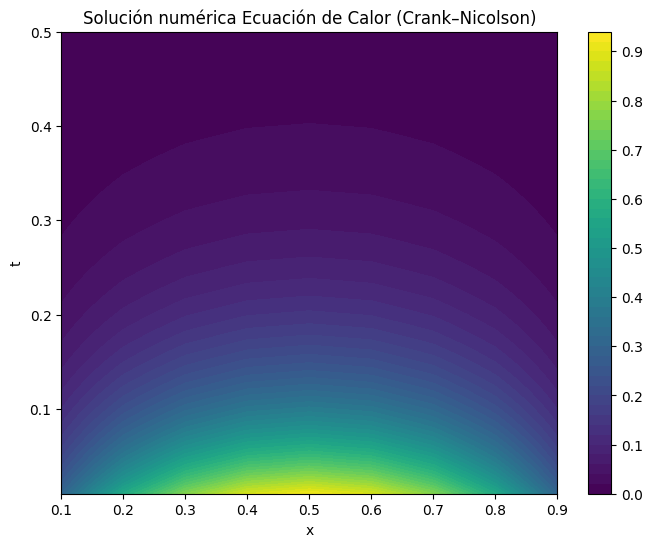

In [85]:
#Mapa de calor
plt.figure(figsize=(8,6))
contour = plt.contourf(X, Y, U_np, levels=50, cmap=cm.viridis)
plt.colorbar(contour)
plt.xlabel("x")
plt.ylabel("t")
plt.title("Solución numérica Ecuación de Calor (Crank–Nicolson)")
plt.show()


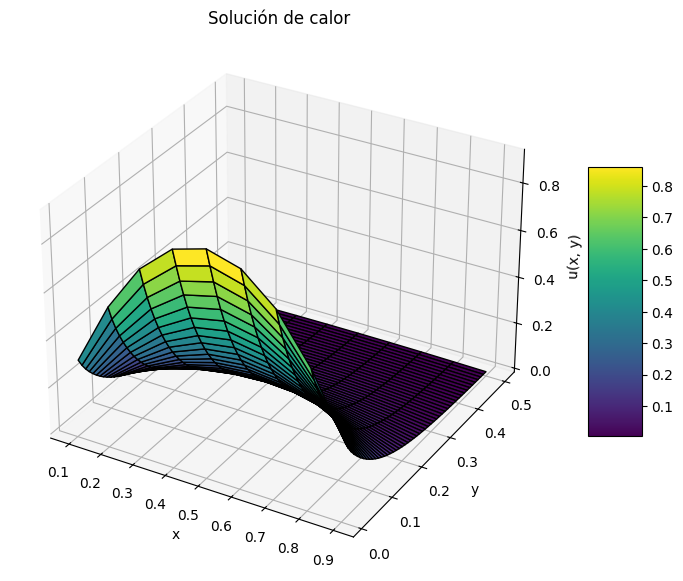

In [86]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de calor')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()